# Gradient Boosting - Lab

## Introduction

In this lab, we'll learn how to use both Adaboost and Gradient Boosting classifiers from scikit-learn!

## Objectives

You will be able to:

- Use AdaBoost to make predictions on a dataset 
- Use Gradient Boosting to make predictions on a dataset 

## Getting Started

In this lab, we'll learn how to use boosting algorithms to make classifications on the [Pima Indians Dataset](http://ftp.ics.uci.edu/pub/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names). You will find the data stored in the file `'pima-indians-diabetes.csv'`. Our goal is to use boosting algorithms to determine whether a person has diabetes. Let's get started!

We'll begin by importing everything we need for this lab. Run cell below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

Now, use Pandas to import the data stored in `'pima-indians-diabetes.csv'` and store it in a DataFrame. Print the first five rows to inspect the data we've imported and ensure everything loaded correctly. 

In [2]:
# Import the data
df = pd.read_csv('pima-indians-diabetes.csv')

# Print the first five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Cleaning, exploration, and preprocessing

The target we're trying to predict is the `'Outcome'` column. A `1` denotes a patient with diabetes. 

By now, you're quite familiar with exploring and preprocessing a dataset.  

In the following cells:

* Check for missing values and deal with them as you see fit (if any exist) 
* Count the number of patients with and without diabetes in this dataset 
* Store the target column in a separate variable and remove it from the dataset
* Split the dataset into training and test sets, with a `test_size` of 0.25 and a `random_state` of 42

In [3]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
import my_functions as mf

In [7]:
plt.style.use('ggplot')
from jupyterthemes import jtplot
jtplot.style()

Variable: Glucose
Normality Test Results for ['Glucose']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Glucose 
 Statistic 
 0.99349 
 9.701042e-01 
 
 
 p-value 
 0.00000 
 1.986761e-11 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Glucose 
 5.965075 
 0.783 
 
 
 Jarque-Bera: 
 
 
 
 Glucose 
 
 
 
 
 Statistic 
 16.502266 
 
 
 p-value 
 0.000261 
 
 
 Skew 
 0.173414 
 
 
 Kurtosis 
 3.628813

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Skew: 0.17341395519987735
Kurtosis: 0.6288133337300685


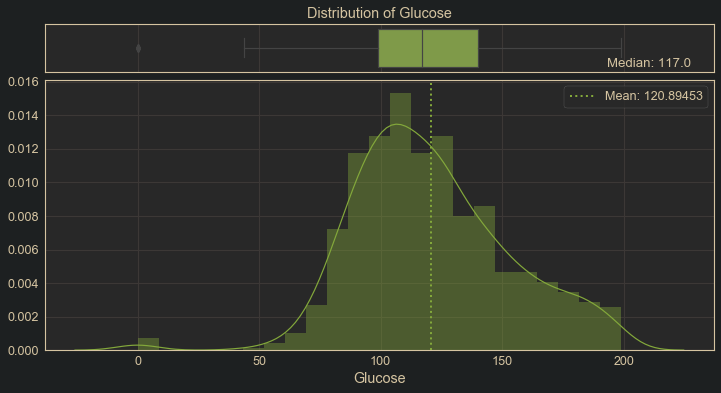

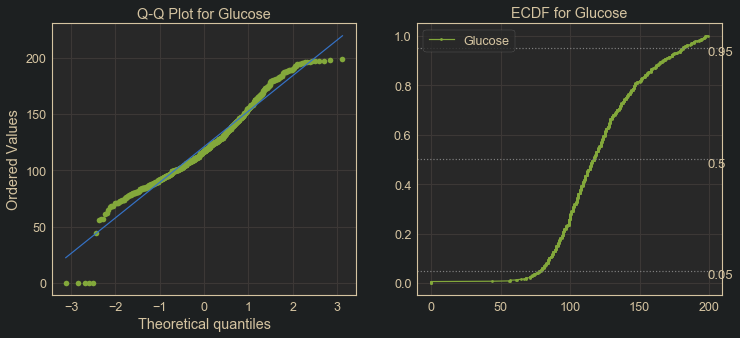

Variable: BloodPressure
Normality Test Results for ['BloodPressure']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 BloodPressure 
 Statistic 
 0.954427 
 8.189212e-01 
 
 
 p-value 
 0.000000 
 1.584007e-28 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 BloodPressure 
 33.900935 
 0.783 
 
 
 Jarque-Bera: 
 
 
 
 BloodPressure 
 
 
 
 
 Statistic 
 1.278356e+03 
 
 
 p-value 
 2.561918e-278 
 
 
 Skew 
 -1.840005e+00 
 
 
 Kurtosis 
 8.138691e+00

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Skew: -1.8400052311728738
Kurtosis: 5.138690662525438


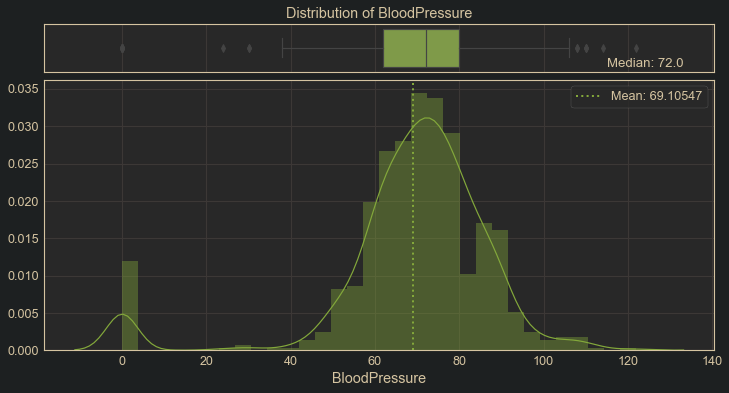

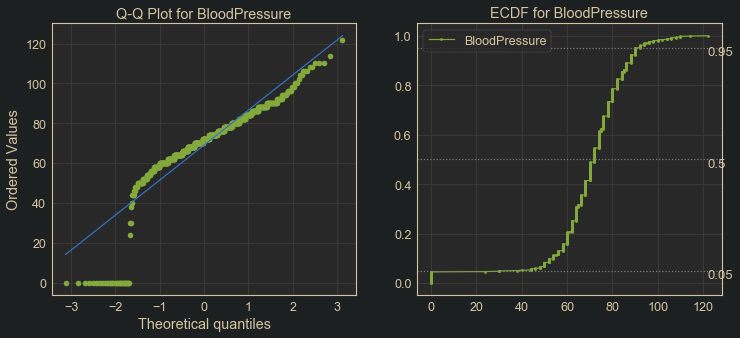

Variable: SkinThickness
Normality Test Results for ['SkinThickness']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 SkinThickness 
 Statistic 
 0.704427 
 9.046273e-01 
 
 
 p-value 
 0.000000 
 1.751576e-21 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 SkinThickness 
 24.618667 
 0.783 
 
 
 Jarque-Bera: 
 
 
 
 SkinThickness 
 
 
 
 
 Statistic 
 10.328224 
 
 
 p-value 
 0.005718 
 
 
 Skew 
 0.109159 
 
 
 Kurtosis 
 2.475506

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

Skew: 0.109158762323673
Kurtosis: -0.5244944887652805


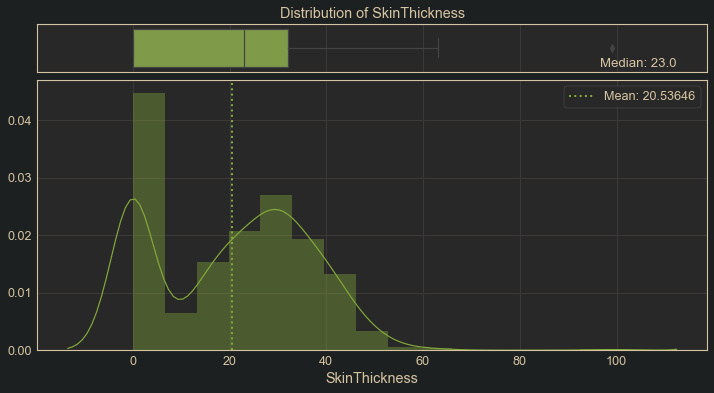

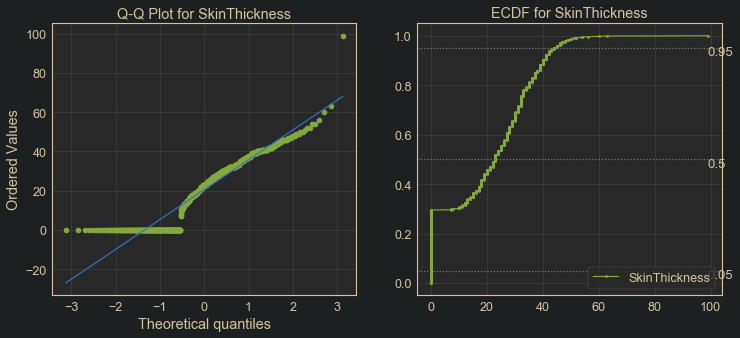

Variable: Insulin
Normality Test Results for ['Insulin']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 Insulin 
 Statistic 
 5.130208e-01 
 7.220207e-01 
 
 
 p-value 
 3.828165e-188 
 7.915248e-34 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 Insulin 
 63.332022 
 0.783 
 
 
 Jarque-Bera: 
 
 
 
 Insulin 
 
 
 
 
 Statistic 
 2298.603843 
 
 
 p-value 
 0.000000 
 
 
 Skew 
 2.267810 
 
 
 Kurtosis 
 10.159575

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

Skew: 2.2678104585131753
Kurtosis: 7.159574916971424


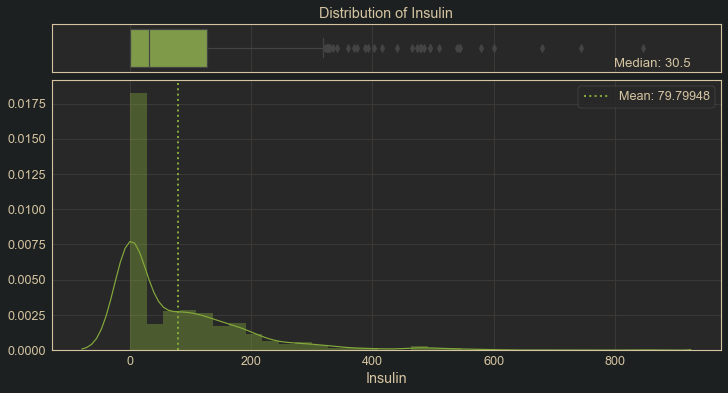

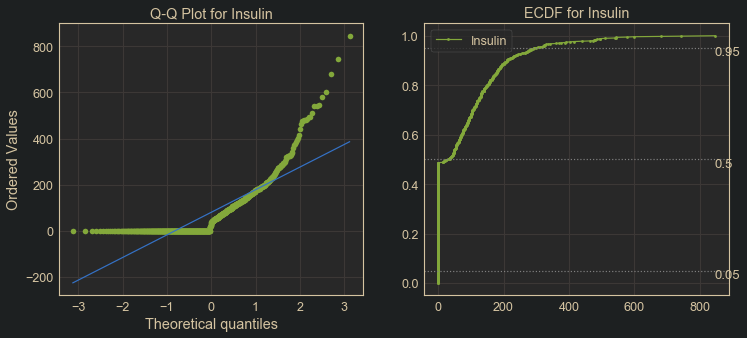

Variable: BMI
Normality Test Results for ['BMI']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 BMI 
 Statistic 
 0.985677 
 9.499888e-01 
 
 
 p-value 
 0.000000 
 1.840562e-15 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 BMI 
 4.189156 
 0.783 
 
 
 Jarque-Bera: 
 
 
 
 BMI 
 
 
 
 
 Statistic 
 3.638089e+02 
 
 
 p-value 
 9.997963e-80 
 
 
 Skew 
 -4.281433e-01 
 
 
 Kurtosis 
 6.261257e+00

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

Skew: -0.42814327880861786
Kurtosis: 3.2612574203612645


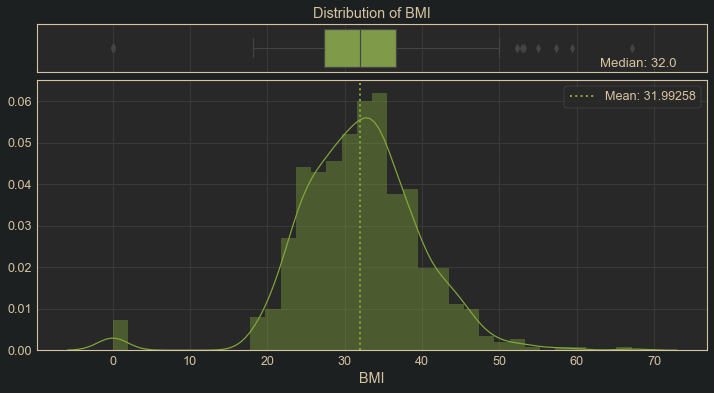

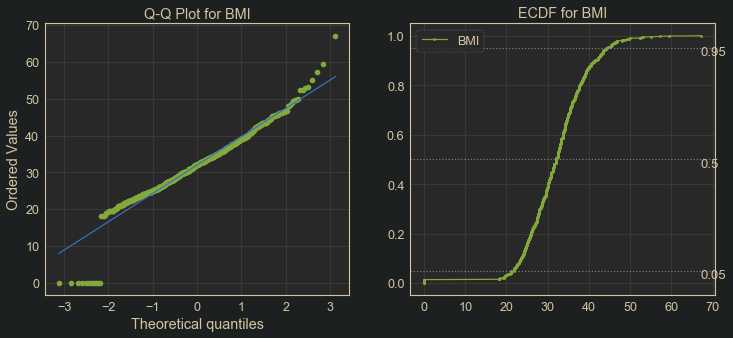

In [8]:
# There appear to be rows which have zeros recorded for columns which couldn't possibly
# contain zeros, these may be missing values recorded as zeros.
mf.visualize_distribution(df, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

In [13]:
# This does seem to be the case, we will need to remove these rows. Let's see if they are for
# the same patients.
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    zero_count = df[df[col] == 0][col].value_counts().values
    print('Number of zeros in {}: {}'.format(col, zero_count))

Number of zeros in Glucose: [5]
Number of zeros in BloodPressure: [35]
Number of zeros in SkinThickness: [227]
Number of zeros in Insulin: [374]
Number of zeros in BMI: [11]


In [14]:
# There are a lot of zeros in some of these columns... nearly half the dataset in the case
# of the insulin measurement
df[df.Insulin == 0]['Outcome'].value_counts()

0    236
1    138
Name: Outcome, dtype: int64

In [16]:
# We can see that there are a good number of both classes within these rows that have missing
# values, we will need to get rid of them to get good information on the value of predictors.
df_fix = df[df.Insulin > 0]
print(df_fix.info())
df_fix.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 3 to 765
Data columns (total 9 columns):
Pregnancies                 394 non-null int64
Glucose                     394 non-null int64
BloodPressure               394 non-null int64
SkinThickness               394 non-null int64
Insulin                     394 non-null int64
BMI                         394 non-null float64
DiabetesPedigreeFunction    394 non-null float64
Age                         394 non-null int64
Outcome                     394 non-null int64
dtypes: float64(2), int64(7)
memory usage: 30.8 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.304569,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721,0.329949
std,3.209635,31.396725,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971,0.470792
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# This has still not removed all of the rows with missing values, we are really getting rid of
# a lot of rows at this point, but let's see what we have left if we remove these rows
df_fix = df_fix[(df.BMI > 0) & (df.Glucose > 0)]
print(df_fix.info())
df_fix.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
Pregnancies                 392 non-null int64
Glucose                     392 non-null int64
BloodPressure               392 non-null int64
SkinThickness               392 non-null int64
Insulin                     392 non-null int64
BMI                         392 non-null float64
DiabetesPedigreeFunction    392 non-null float64
Age                         392 non-null int64
Outcome                     392 non-null int64
dtypes: float64(2), int64(7)
memory usage: 30.6 KB
None


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
# Number of patients with and without diabetes
df_fix.Outcome.value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [21]:
target = df_fix.Outcome
X = df_fix.drop('Outcome', axis=1)

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59


In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=42)

## Train the models

Now that we've explored the dataset, we're ready to fit some models!

In the cell below:

* Instantiate an `AdaBoostClassifier` (set the `random_state` for 42)
* Instantiate a `GradientBoostingClassifer` (set the `random_state` for 42) 

In [24]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

Now, fit the training data to both the classifiers: 

In [25]:
# Fit AdaBoostClassifier
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [26]:
# Fit GradientBoostingClassifier
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Now, let's use these models to predict labels on both the training and test sets: 

In [27]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

Now, complete the following function and use it to calculate the accuracy and f1-score for each model: 

In [28]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.9149659863945578
F1-Score: 0.8677248677248677

Model: Gradient Boosted Trees
Accuracy: 0.9897959183673469
F1-Score: 0.9844559585492229

Testing Metrics
Model: AdaBoost
Accuracy: 0.7346938775510204
F1-Score: 0.59375

Model: Gradient Boosted Trees
Accuracy: 0.7448979591836735
F1-Score: 0.5762711864406779


Let's go one step further and create a confusion matrix and classification report for each. Do so in the cell below: 

In [31]:
from sklearn.metrics import plot_confusion_matrix

In [29]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[53, 13],
       [13, 19]], dtype=int64)

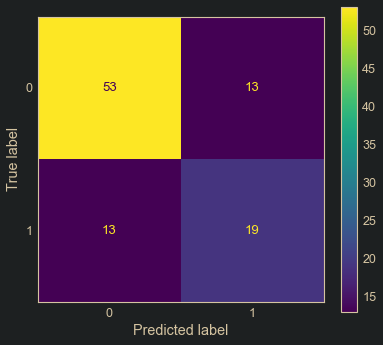

In [33]:
fig, ax = plt.subplots()
ax.grid(False)
plot_confusion_matrix(adaboost_clf, X_test, y_test, ax=ax)

In [34]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[56, 10],
       [15, 17]], dtype=int64)

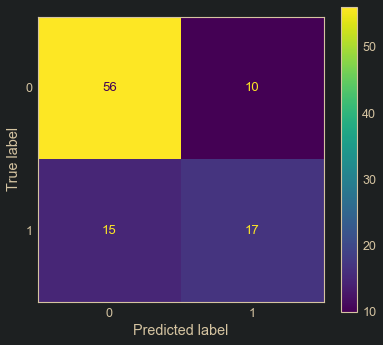

In [36]:
fig, ax = plt.subplots()
ax.grid(False)
plot_confusion_matrix(gbt_clf, X_test, y_test, ax=ax)

In [37]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        66
           1       0.59      0.59      0.59        32

    accuracy                           0.73        98
   macro avg       0.70      0.70      0.70        98
weighted avg       0.73      0.73      0.73        98



In [38]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        66
           1       0.63      0.53      0.58        32

    accuracy                           0.74        98
   macro avg       0.71      0.69      0.70        98
weighted avg       0.74      0.74      0.74        98



**_Question:_** How did the models perform? Interpret the evaluation metrics above to answer this question.

Write your answer below this line:
_______________________________________________________________________________________________________________________________
<br>
The model was better at identifying patients without diabetes than those with. For those with diabetes, the model only correctly labeled 53% of them. Further, of the number of patients that the model labeled as having diabetes, only 63% of them actually had it. This is not a good model for determining which patients have diabetes. This could be the result of dropping rows with missing values rather than imputing them.
 
 
As a final performance check, let's calculate the 5-fold cross-validated score for each model! 

Recall that to compute the cross-validation score, we need to pass in:

* A classifier
* All training data
* All labels
* The number of folds we want in our cross-validation score  

Since we're computing cross-validation score, we'll want to pass in the entire dataset, as well as all of the labels. 

In the cells below, compute the mean cross validation score for each model. 

In [40]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X, target).mean())
# Expected Output: 0.7631270690094218

Mean Adaboost Cross-Val Score (k=5):
0.7629665692956833


In [41]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, target).mean())
# Expected Output: 0.7591715474068416

Mean GBT Cross-Val Score (k=5):
0.7909444985394354


These models didn't do poorly, but we could probably do a bit better by tuning some of the important parameters such as the **_Learning Rate_**. 

## Summary

In this lab, we learned how to use scikit-learn's implementations of popular boosting algorithms such as AdaBoost and Gradient Boosted Trees to make classification predictions on a real-world dataset!

In [42]:
# Trying again by imputing missing values
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [104]:
df_fix2 = df.copy()
for col in cols:
    df_fix2.loc[df_fix2[col]==0, col] = df_fix2[col].median()
df_fix2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [105]:
y = df_fix2.Outcome
X = df_fix2.drop('Outcome', axis=1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [107]:
adaboost_clf = AdaBoostClassifier(random_state=42)
gbt_clf = GradientBoostingClassifier(random_state=42)

In [108]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [109]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [110]:
adaboost_train_preds = adaboost_clf.predict(X_train)
gbt_clf_train_preds = gbt_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [111]:
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.8298611111111112
F1-Score: 0.7447916666666666

Model: Gradient Boosted Trees
Accuracy: 0.9322916666666666
F1-Score: 0.8987012987012987

Testing Metrics
Model: AdaBoost
Accuracy: 0.734375
F1-Score: 0.6330935251798562

Model: Gradient Boosted Trees
Accuracy: 0.7395833333333334
F1-Score: 0.6621621621621622


In [112]:
print('Adaboost Classification Report:')
print(classification_report(y_test, adaboost_test_preds))

Adaboost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       123
           1       0.63      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.73      0.73       192



In [113]:
print('Gradient Boost Classification Report')
print(classification_report(y_test, gbt_clf_test_preds))

Gradient Boost Classification Report
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       123
           1       0.62      0.71      0.66        69

    accuracy                           0.74       192
   macro avg       0.72      0.73      0.73       192
weighted avg       0.75      0.74      0.74       192



In [114]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X, y).mean())
# Expected Output: 0.7631270690094218

Mean Adaboost Cross-Val Score (k=5):
0.7487310075545369


In [115]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y).mean())
# Expected Output: 0.7591715474068416

Mean GBT Cross-Val Score (k=5):
0.7708428826075885


In [ ]:
# Although the accuracies from our classification reports are the same, the precision and
# recall scores have improved as a result of imputing the values rather than dropping them.

In [70]:
# Trying one more time without adjusting for missing values at all
X = df.drop('Outcome', axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [71]:
adaboost_clf = AdaBoostClassifier(random_state=42)
gbt_clf = GradientBoostingClassifier(random_state=42)

In [72]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [73]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [74]:
adaboost_train_preds = adaboost_clf.predict(X_train)
gbt_clf_train_preds = gbt_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [75]:
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.8350694444444444
F1-Score: 0.7493403693931399

Model: Gradient Boosted Trees
Accuracy: 0.9409722222222222
F1-Score: 0.9105263157894736

Testing Metrics
Model: AdaBoost
Accuracy: 0.7239583333333334
F1-Score: 0.618705035971223

Model: Gradient Boosted Trees
Accuracy: 0.7447916666666666
F1-Score: 0.6620689655172414


In [76]:
print('Adaboost Classification Report:')
print(classification_report(y_test, adaboost_test_preds))

Adaboost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       123
           1       0.61      0.62      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



In [77]:
print('Gradient Boost Classification Report')
print(classification_report(y_test, gbt_clf_test_preds))

Gradient Boost Classification Report
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       123
           1       0.63      0.70      0.66        69

    accuracy                           0.74       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.74      0.75       192



In [78]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X, y).mean())
# Expected Output: 0.7631270690094218

Mean Adaboost Cross-Val Score (k=5):
0.7631270690094218


In [79]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y).mean())
# Expected Output: 0.7591715474068416

Mean GBT Cross-Val Score (k=5):
0.7591715474068416


In [ ]:
# The best mixture of precision, recall, and accuracy so far have been achieved by imputing
# the missing values with the column medians